In [ ]:
#upload textfile into colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dialogs.txt to dialogs.txt
User uploaded file "dialogs.txt" with length 243904 bytes


In [ ]:
#Read the text file
Text= open('dialogs.txt', 'r') # 'r' is default

In [ ]:
#Explore the textfile
print(Text.read())

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [ ]:
! pip install nlputils

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import nlputils as nu


In [ ]:
# read text file into pandas DataFrame and create 
# header with names
df = pd.read_csv("dialogs.txt", sep="\t", header=None, 
                 names=["Query", "Response"])
  
# display DataFrame
df.head()

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [ ]:
#Exploring the data frame
df.describe()

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [ ]:
df.nunique()

Query       3510
Response    3512
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [ ]:
#checking for null values in the df
df.isnull().sum()

Query       0
Response    0
dtype: int64

In [ ]:
#getting value counts(query)
df['Query'].value_counts()

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Query, Length: 3510, dtype: int64

In [ ]:
#getting value counts(Response)
df['Response'].value_counts()

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3512, dtype: int64

In [ ]:
#sentimental analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
#Exploring query statements
qstatements=df['Query']

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
List=SentimentIntensityAnalyzer()
for sentence in qstatements:
  print(sentence)
  results=List.polarity_scores(sentence)
  for k in results:
    print('{0}:{1},'.format(k,results[k]),end='')
  print()


Streaming output truncated to the last 5000 lines.
of course i heard that. i thought a plane had crashed into your house.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
it wasn't that loud.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
i will blow my nose sometime for you, and you'll see.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
okay. i'll take your word for it.
neg:0.0,neu:0.759,pos:0.241,compound:0.2263,
i thought you had an elephant in your house.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
you're funny.
neg:0.0,neu:0.256,pos:0.744,compound:0.4404,
what did you say? i think i've gone deaf.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
i have lots of friends.
neg:0.0,neu:0.492,pos:0.508,compound:0.4767,
really? how many do you have?
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
i don't know, maybe one hundred.
neg:0.0,neu:1.0,pos:0.0,compound:0.0,
that is a lot of friends. do you have a best friend?
neg:0.0,neu:0.4,pos:0.6,compound:0.8885,
of course. i have lots of best friends.
neg:0.0,neu:0.407,pos:0.593,compound:0.8074,
h

In [ ]:
#placing the results into a dataframe
analyzer=SentimentIntensityAnalyzer()
df['rating']=qstatements.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'],axis=1),df['rating'].apply(pd.Series)],axis=1)

In [ ]:
#explore the data frame
df.head()

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249


In [ ]:
#create a word cloud
from wordcloud import WordCloud

In [ ]:
#define a word cloud function
#visualize the word cloud
def wordcloud(df,label):
  subset=df[df[label]==1]
  text=df.Query.values
  wc=WordCloud(background_color='black',max_words=500)
  wc.generate(" ".join(text))

  #plot
  plt.figure(figsize=(20,20))
  plt.subplot(221)
  plt.axis("off")
  plt.title("Words frequented in {}".format(label),fontsize=20)
  plt.imshow(wc.recolor(colormap="gist_earth",random_state=244),alpha=0.98)



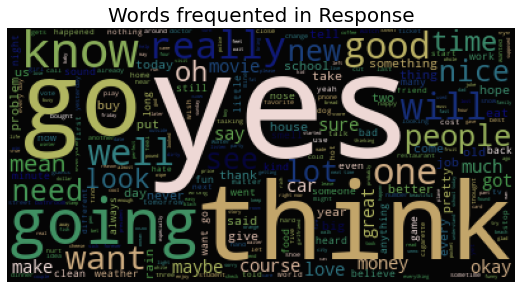

In [ ]:
#output for response column
wordcloud(df,"Response")

Normalize **text**

In [ ]:
#import regular expressions
import re

In [ ]:
#convert your text to lower case using a lambda function
lowertext=lambda x: re.sub('[%s]'% re.escape(string.punctuation),' ',x.lower())

In [ ]:
#remove \n from the text and replacing with ""
remove_n=lambda x: re.sub("\n", " ", x)

In [ ]:
#remove all non ascii characters
removenonascii=lambda x: re.sub(r'[^\x00-\x7f]',r'',x) 

In [ ]:
#remove alphanumeric values
remove_alphanumeric=lambda x: re.sub('\w*\d\w*',r'',x)

In [ ]:
#use the map function to apply the lambda functions
#apply on the query column
df['Query']=df['Query'].map(lowertext).map(remove_n).map(removenonascii).map(remove_alphanumeric)

In [ ]:
#apply on the REsponse column
df['Response']=df['Response'].map(lowertext).map(remove_n).map(removenonascii).map(remove_alphanumeric)


In [ ]:
#explore the final dataframe
df.head()

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249


Important sentences

In [ ]:
#arranging sentences based on compound
important_sentence=df.sort_values(by="compound", ascending=False)

In [ ]:
#Explore the newly sorted dataframe
important_sentence.head()

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


In [ ]:
#arrange sentences based on positivity
#exploring the dataframe
positive_sentences=df.sort_values(by='pos',ascending=False)
positive_sentences.head()

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


In [ ]:
#arrange sentences based on negativity
#exploring the DF
neg_sentences=df.sort_values(by='neg', ascending=False)
neg_sentences.head()

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


In [ ]:
#arrange sentences based on neutrality
#exploring the DF
neu_sentences=df.sort_values(by='neu', ascending=False)
neu_sentences.head()

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


APPLICATION

In [ ]:
#IMPORT THE TFIDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#word embedding TF-IDF
tfidf=TfidfVectorizer()

In [ ]:
#change the query column into an array
factors=tfidf.fit_transform(df["Query"]).toarray()

In [ ]:
#display feature names
tfidf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'areat',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 

In [ ]:
from sklearn.metrics.pairwise import cosine_distances

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#defining a chatbox (function)
query='Who are you?'
def ChatBot (query):
  #step 1: clean the query
  query=lemmatizer.lemmatize(query)
  query=[query]
  #step 2: word embedding- transform
  query_vector=tfidf.transform(query).toarray()
  #step 3: cosine similarity
  similar_score=1-cosine_distances(factors, query_vector)
  index=similar_score.argmax() #take max index position
  #searching or matching question
  matching_question=df.loc[index]['Query']
  response=df.loc[index]['Response']
  pos_score=df.loc[index]['pos']
  neu_score=df.loc[index]['neu']
  neg_scores=df.loc[index]['neg']
  confidence=similar_score[index][0]
  chat_dict={'match':matching_question, 'response':response, 'score':confidence, 'pos':pos_score, 'neu':neu_score, 'neg':neg_scores}
  return (chat_dict)
ChatBot(query)


{'match': 'who ',
 'neg': 0.0,
 'neu': 1.0,
 'pos': 0.0,
 'response': 'two students from usc ',
 'score': 0.7673541951572864}

In [ ]:
while True:
  query=input('Query: ')
  
  if query=='exit':
    break
  response=ChatBot(query)
  if response['score']<=0.2:
    
    print('Bot: please rephrase your question')
  else:
    
    print('='*80)
    print('logs:\n Matched Question: %r\n Confidence Score: %0.2f\n Positive score: %r\n Negative score: %r\n Neutral score: %r'
    %(response['match'],response['score']*100, response['pos'], response['neg'], response['neu']))
    print('='*80)
    print('Bot: ', response['response'])
  break


Query: When can i come
logs:
 Matched Question: 'do you think you can come '
 Confidence Score: 56.88
 Positive score: 0.0
 Negative score: 0.0
 Neutral score: 1.0
Bot:  i m sorry  i m already doing something this friday 
